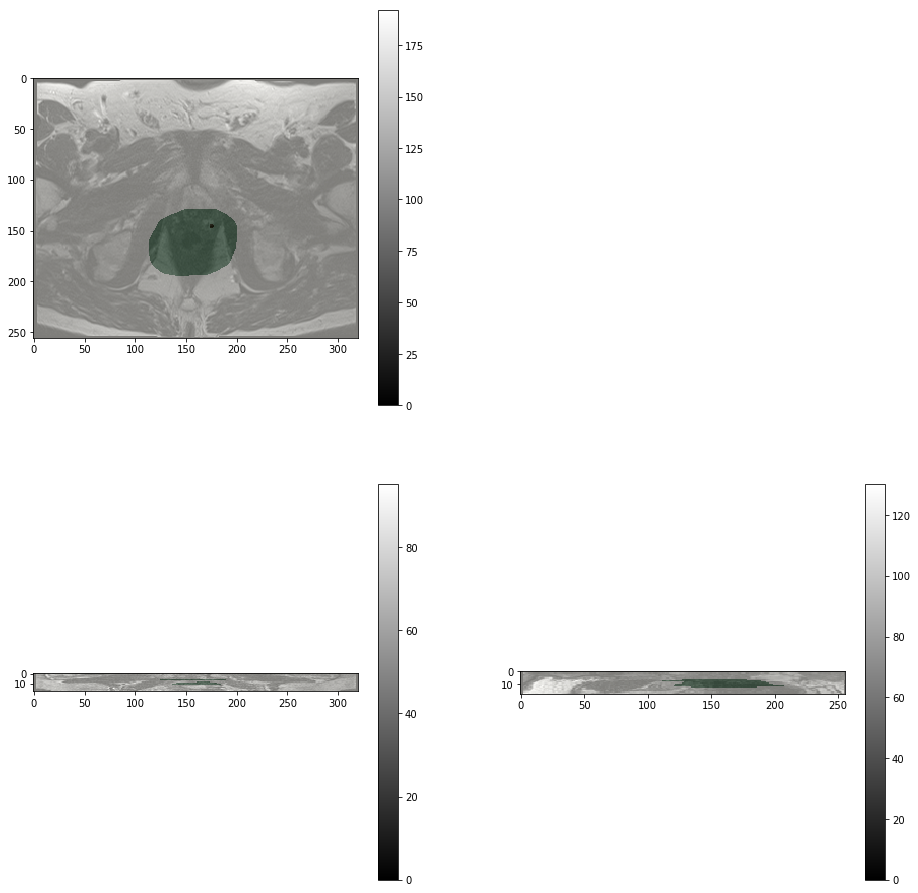

In [1]:
import numpy as np
import os
import glob
import shutil
import SimpleITK as sitk
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

from project.utils import IntermediateUtil
from project.settings import cases_root, slicer_dir, intermediate_dir


def browse_data(vol_array, map_array=None, mask_array=None, overlap=False):
    def view_img(sample_0, sample_1, sample_2):
        fig = plt.figure(figsize=(16, 16));
        plt.subplot(221)
        ax = plt.imshow(vol_array[sample_0,:,:],cmap=plt.cm.gray, interpolation='none')
        if overlap == True:
            bx = plt.imshow(map_array[sample_0,:,:],cmap=plt.cm.Reds, alpha=0.3)
            cs = plt.imshow(mask_array[sample_0,:,:],cmap=plt.cm.Greens, alpha=0.3)
        fig.colorbar(ax)
        plt.subplot(223)
        ax = plt.imshow(vol_array[:,sample_1,:],cmap=plt.cm.gray,interpolation='none')
        if overlap == True:
            bx = plt.imshow(map_array[:,sample_1,:],cmap=plt.cm.Reds, alpha=0.3)
            cs = plt.imshow(mask_array[:,sample_1,:],cmap=plt.cm.Greens, alpha=0.3)
        fig.colorbar(ax)
        plt.subplot(224)
        ax = plt.imshow(vol_array[:,:,sample_2],cmap=plt.cm.gray,interpolation='none')
        if overlap == True:
            bx = plt.imshow(map_array[:,:,sample_2],cmap=plt.cm.Reds, alpha=0.3)
            cs = plt.imshow(mask_array[:,:,sample_2],cmap=plt.cm.Greens, alpha=0.3)
        fig.colorbar(ax)
    interact(view_img, sample_0=(0,vol_array.shape[0]-1), sample_1=(0,vol_array.shape[1]-1), sample_2=(0,vol_array.shape[2]-1))



if __name__ == '__main__':
    iu = IntermediateUtil(intermediate_dir, sub_dir = "nrrd_resample/")
    volumes = iu.get_needle_vol_files()
    labelmaps = iu.get_needle_map_files()
    masks = iu.get_prostate_mask_files()
        
    OUTPUTFILE = "./statistics_resample.txt"
    if not os.path.exists(OUTPUTFILE):
        with open(OUTPUTFILE, "w+") as output_file:
            for i,volume in enumerate(volumes):
                assert os.path.basename(volumes[i])[:15] == os.path.basename(labelmaps[i])[:15]
                assert os.path.basename(volumes[i])[:15] == os.path.basename(masks[i])[:15]
                vol_array = sitk.GetArrayFromImage(sitk.ReadImage(volumes[i]))
                label_array = sitk.GetArrayFromImage(sitk.ReadImage(labelmaps[i]))
                mask_array = sitk.GetArrayFromImage(sitk.ReadImage(masks[i]))
                assert vol_array.shape == label_array.shape
                assert vol_array.shape == mask_array.shape
                output_file.write("{} Volume {} {} {} Labelmap {} Mask {}\n".format(os.path.basename(volume), \
                                            vol_array.shape, np.amin(vol_array), np.amax(vol_array), np.unique(label_array), np.unique(mask_array)))  

    
    volume_path = iu.get_needle_vol_files_with_case("Case256")[0]
    labelmap_path = iu.get_needle_map_files_with_case("Case256")[0]
    mask_path = iu.get_prostate_mask_files_with_case("Case011")[0]
    vol_img = sitk.ReadImage(volume_path)
    map_img = sitk.ReadImage(labelmap_path)
    mask_img = sitk.ReadImage(mask_path)
    vol_array = sitk.GetArrayFromImage(vol_img)
    map_array = sitk.GetArrayFromImage(map_img)
    mask_array = sitk.GetArrayFromImage(mask_img)
    browse_data(vol_array, map_array, mask_array, overlap=True)
